In [33]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [42]:
### use this function whenever you are going to read an image otherwise all functions won't work ###
def RGB2GRAY(image,imagePATH = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    for row in image:
        tmpRow = []
        for pixel in row:
            tmpRow.append(int(sum(pixel)/3))
            #tmpRow.append(0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2])# OpenCV’s cvtColor() algorithm
        newImage.append(tmpRow)
    return newImage

In [3]:
def threshold(image,imagePATH = None, threshold = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    maxValue = np.max(image)
    minValue = np.min(image)
    avgValue = threshold if threshold != None else (maxValue + minValue)/2
    for row in image:
        tmpRow = []
        for pixel in row:
            tmpRow.append(maxValue if pixel > avgValue else minValue)
        newImage.append(tmpRow)
    return newImage

In [47]:
def resampleUp(image, imagePATH = None, scale = 2):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    for row in image:
        tmp = []
        for pixel in row:
            tmp.append(pixel)
            # duplicate column
            for _ in range(scale-1):
                tmp.append(pixel)
                
        newImage.append(tmp)
        # duplicate row
        for _ in range(scale-1):
            newImage.append(tmp)
            
    return np.array(newImage)

In [48]:
def subSample(image, imagePATH = None, n_subSamples = 1, nIgnoredSamples = 1):
    newImage = []
    if imagePATH != None:
        image = cv.imread(imagePATH)
    rowCounter = 0
    columnCounter = 0
    for _ in range(n_subSamples):
        newImage = []
        for row in image:
            tmp = []
            for column in row:
                if columnCounter == 0:
                    columnCounter = nIgnoredSamples
                    tmp.append(column)
                else:
                    columnCounter -= 1
                
            if rowCounter == 0:
                rowCounter = nIgnoredSamples
                newImage.append(tmp)
            else:
                rowCounter -= 1
                
        image = newImage
    return np.array(image)

In [49]:
from math import pow

def changeGrayLevel(image, imagePATH = None, grayLevelBit = 4):
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    newImage = []
    TARGETED_GRAY_LEVEL = pow(2, grayLevelBit)
    TARGET_COMPR_FACTOR = 256/TARGETED_GRAY_LEVEL
    

    for row in image:
        tmpImage = []
        for pixel in row:
            tmpImage.append(np.floor( (pixel/256) * TARGETED_GRAY_LEVEL) * TARGET_COMPR_FACTOR)
            #tmpImage.append( pixel * grayLevelBit / 8 )
        newImage.append(tmpImage)
    return np.array(newImage)

In [50]:
def negativeTransform(image, imagePATH = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    for row in image:
        tmpImage = []
        for pixel in row:
            tmpImage.append(255 - pixel)
        newImage.append(tmpImage)
    return newImage

In [51]:
from math import log

def logTransform(image, imagePATH = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    for row in image:
        tmpImage = []
        for pixel in row:
            tmpImage.append(log(1 + pixel))
        newImage.append(tmpImage)
    return newImage

In [52]:
def power(image, imagePATH = None, gamma = 1):
    """gamma = 1 ==> no change"""
    """gamma > 1 ==> brighter"""
    """gamma < 1 ==> darker"""
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    newImage = []
    for row in image:
        tmpImage = []
        for pixel in row:
            val = pixel ** gamma
            val = val * 2
            tmpImage.append(val if val < 255 else 255)
        newImage.append(tmpImage)
    return newImage

In [53]:
# problem
def contrast(image, imagePATH = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    newImage = []
    minValue = np.min(image)
    maxValue = np.max(image)
    for row in image:
        tmpImage = []
        for pixel in row:
            result = ( (255 - 0) / (maxValue - minValue) ) * (pixel - minValue) + 0
            result = list(result)[0]
            tmpImage.append(result)
        newImage.append(tmpImage)
    return newImage
    

In [54]:
def sliceGrayLevel(image, imagePATH = None, startRange = 50, endRange = 100, approach = 1):
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    newImage = []
    for row in image:
        tmpImage = []
        for pixel in row:
            if pixel >= startRange and pixel < endRange:
                tmpImage.append(255)
            else:
                if approach == 1:
                    tmpImage.append(0)
                elif approach == 2:
                    tmpImage.append(pixel)
        newImage.append(tmpImage)
    return newImage

In [55]:
def addConstant(image,imagePATH = None, constant = 0):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    for row in image:
        tmpRow = []
        for pixel in row:
            tmpRow.append(pixel + constant)
        newImage.append(tmpRow)
    return newImage

In [56]:
def subtractConstant(image,imagePATH = None, constant = 0):
    if imagePATH != None:
        image = cv.imread(imagePATH)
        
    newImage = []
    for row in image:
        tmpRow = []
        for pixel in row:
            tmpRow.append(pixel - constant)
        newImage.append(tmpRow)
    return newImage

In [57]:

def subtractImage(image1, image2, imagePATH1 = None, imagePATH2 = None):
    if imagePATH1 != None:
        image1 = cv.imread(imagePATH1)
    if imagePATH2 != None:
        image1 = cv.imread(imagePATH2)
        
    newImage = []
    for row1,row2 in zip(image1, image2):
        tmpRow = []
        for pixel1, pixel2 in zip(row1, row2):
            tmpRow.append(np.abs(pixel1 - pixel2))
        newImage.append(tmpRow)
    return newImage

In [ ]:
def logicalOperation(operator, image1, image2, imagePATH1 = None, imagePATH2 = None):
    if imagePATH1 != None:
        image1 = cv.imread(imagePATH1)
    if imagePATH2 != None:
        image1 = cv.imread(imagePATH2)
        
    newImage = []
    image1 = np.array(image1)
    image2 = np.array(image2)
    if operator == "and":
        newImage = cv.bitwise_and(image1, image2)
    elif operator == "or":
        newImage = cv.bitwise_or(image1, image2)
    elif operator == "xor":
        newImage = cv.bitwise_xor(image1, image2)
    
    return newImage

In [2]:
def decimalTo_8bit_Binary(n):
    binaryNum =  bin(n).replace("0b", "")
    for _ in range(len(binaryNum), 8):
        binaryNum = "0" + binaryNum
    return binaryNum

def getPixelValue(binaryNum, n_slices):
    value = 0
    for i in range(n_slices):
        if binaryNum[i] == "1":
            value += 2**int(7-i)
    return value

def getSpecificBitPixelValue(binaryNum, specificBit):
    return 2 ** (7 - specificBit) if binaryNum[specificBit] == "1" else 0

def bitPlaneSlice(image, imagePATH = None, n_slices = 2, specificBit = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    newImage = []
    for row in image:
        tmpImage = []
        for pixel in row:
            if specificBit == None:
                tmpImage.append(getPixelValue(decimalTo_8bit_Binary(pixel), n_slices))
            else:
                tmpImage.append(getSpecificBitPixelValue(decimalTo_8bit_Binary(pixel), specificBit))
        newImage.append(tmpImage)
    return newImage

In [5]:
def getImageMap(image):
    numberList = list(range(0,256))
    valMap = {}
    for row in image:
        for pixel in row:
            if pixel in valMap.keys():
                valMap[pixel] += 1
            else:
                valMap[pixel] = 1
                numberList.remove(pixel)
                
    for n in numberList:
        valMap[n] = 0
        
    return valMap

def plotImage(image, imagePATH = None, figSize = 10, xticks = None, yticks = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    valMap = getImageMap(image)
    
    plt.figure(figsize=(figSize, figSize))
    if xticks != None:
        plt.xticks(np.arange(0,xticks,1))
    if yticks != None:
        plt.xticks(np.arange(0,yticks,1))
    plt.stem(list(valMap.keys()), list(valMap.values()))
    
def equalizeImage(image, imagePATH = None):
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    imageMap = getImageMap(image)
    comulativeMap = {}
    comulativeMap[0] = imageMap[0]
    for i in range(1, 256):
        comulativeMap[i] = imageMap[i] + comulativeMap[i-1]
    
    newImage = []
    for row in image:
        tmpImage = []
        for pixel in row:
            result = round( (255/comulativeMap[255]) * comulativeMap[pixel] )
            tmpImage.append(result)
        newImage.append(tmpImage)
    return newImage


In [57]:
def getPixelMask(image, index, index2, filterSize):
    maskStartUpRange = index - int(filterSize/2)
    maskEndBottomRange = index + int(filterSize/2)
    maskStartLeftRange = index2 - int(filterSize/2)
    maskEndRightRange = index2 + int(filterSize/2)
    numberOfRows = len(image)
    numberOfColumns = len(image[0])
    mask = []
    
    if filterSize == 2:
        pixel1 = image[index][index2]
        pixel2 = image[index][index2+1] if index2+1 < numberOfColumns else 0
        pixel3 = image[index+1][index2] if index+1 < numberOfRows else 0
        pixel4 = image[index+1][index2+1] if index2+1 < numberOfColumns and index+1 < numberOfRows else 0
        
        mask.append([[pixel1, pixel2],[pixel3, pixel4]])
    else:
        for i in  range(maskStartUpRange, maskEndBottomRange + 1):
            tmpRow = []
            for j in range(maskStartLeftRange, maskEndRightRange + 1):
                if i < 0 or j < 0 or i >= numberOfRows or j >= numberOfColumns:
                    tmpRow.append(0)
                else:
                    tmpRow.append(image[i][j])
            mask.append(tmpRow)
    
    mask = np.array(mask).reshape(filterSize, filterSize)
    return mask

def getMasks(image, filterSize=3):
    masks = []
    for index in range(len(image)):
        for index2 in range(len(image[0])):
            masks.append(getPixelMask(image, index, index2, filterSize))
    return masks

def applySpecificFilter(image, masks, filterType = "average", shape = None):
    newImage = []
    
    if filterType == "average":
        for i in masks:
            newImage.append(round(np.average(i)))
    
    elif filterType == "weightedAverage":
        for i in masks:
            weightedFilter = np.array([[1,2,1],[2,4,2],[1,2,1]])
            value = np.sum(np.multiply(i, weightedFilter))/16
            newImage.append(round(value))
    
    elif filterType == "median":
        for i in masks:
            newImage.append(np.median(i))
    
    elif filterType == "max":
        for i in masks:
            newImage.append(np.max(i))
    
    elif filterType == "min":
        for i in masks:
            newImage.append(np.min(i))
    
    elif filterType == "sharpening1stDerivative":
        for i in range(len(image)):
            for j in range(len(image[0])):
                currentPixel = image[i][j]
                nextPixel = image[i][j+1] if j+1 < len(image[0]) else 0
                
                value = currentPixel + (nextPixel - currentPixel)
                newImage.append(value)
                
    elif filterType == "sharpening2ndDerivativeCompositeLaplacian":
        for i in masks:
            compositeFilter = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
            
            value = np.sum(np.multiply(i, compositeFilter))
            newImage.append(value)

    elif filterType == "SobelOperators":
        for i in masks:
            filter1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
            filter2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
            
            value = np.sum(np.multiply(i, filter1)) + np.sum(np.multiply(i, filter2))
            newImage.append(value if value <= 255 else 0)
    
    elif filterType == "RobertsOperators":
        for i in masks:
            filter1 = np.array([[-1,0],[0,1]])
            filter2 = np.array([[0,-1],[1,0]])
            
            value = np.sum(np.multiply(i, filter1)) + np.sum(np.multiply(i, filter2))
            newImage.append(value if value <= 255 else 0)
    
    newImage = np.array(newImage).reshape(shape)
    return newImage
            

def applyFilter(image, imagePATH = None, filterSize = 3, filterType = "average"):
    """filterType: average, median, max, min, weightedAverage, sharpening1stDerivative, sharpening2ndDerivativeCompositeLaplacian, SobelOperators"""
    """filterSize: odd number only (3,5,7,9,11,13,15, ...)"""
    if imagePATH != None:
        image = cv.imread(imagePATH)
    
    masks = getMasks(image, filterSize)
    newImage = applySpecificFilter(image, masks, filterType, (len(image), len(image[0])))
    return newImage

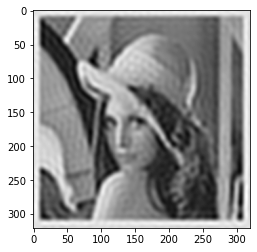

In [40]:
### Ideal LowPass Filter
image = cv.imread("../Image Processing GUI/grayImage.png")
image = np.array(RGB2GRAY(image))

M = len(image)
N = len(image[0])

FT_img = np.fft.fft2(image)
D0 = 30

u = np.arange(0, M)
idx = np.argwhere(u>M/2)
u[idx] = u[idx]-M

v = np.arange(0, N)
idy = np.argwhere(v>N/2)
v[idy] = v[idy]-N

V, U = np.meshgrid(v, u)

D = np.sqrt(U**2 + V**2)

H = (D <= D0)

outputImage = np.fft.ifft2(FT_img * H)
plt.imshow(outputImage.real, cmap='gray')

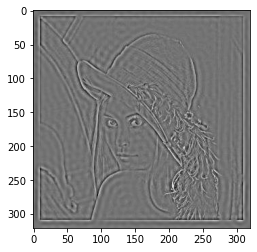

In [41]:
### Ideal HighPass Filter
image = cv.imread("../Image Processing GUI/grayImage.png")
image = np.array(RGB2GRAY(image))

M = len(image)
N = len(image[0])

FT_img = np.fft.fft2(image)
D0 = 30

u = np.arange(0, M)
idx = np.argwhere(u>M/2)
u[idx] = u[idx]-M

v = np.arange(0, N)
idy = np.argwhere(v>N/2)
v[idy] = v[idy]-N

V, U = np.meshgrid(v, u)

D = np.sqrt(U**2 + V**2)

H = (D > D0)

outputImage = np.fft.ifft2(FT_img * H)
plt.imshow(outputImage.real, cmap='gray')

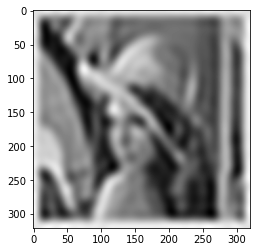

In [42]:
### ButterWorth LowPass Filter
image = cv.imread("../Image Processing GUI/grayImage.png")
image = np.array(RGB2GRAY(image))

M = len(image)
N = len(image[0])

FT_img = np.fft.fft2(image)
D0 = 15
n = 15

u = np.arange(0, M)
idx = np.argwhere(u>M/2)
u[idx] = u[idx]-M

v = np.arange(0, N)
idy = np.argwhere(v>N/2)
v[idy] = v[idy]-N

V, U = np.meshgrid(v, u)

D = np.sqrt(U**2 + V**2)

H = 1/(1+(D/D0)**n)

outputImage = np.fft.ifft2(FT_img * H)
plt.imshow(outputImage.real, cmap='gray')

C:\Users\mahmo\AppData\Local\Temp/ipykernel_19220/951917392.py:24: RuntimeWarning: divide by zero encountered in true_divide
  H = 1/(1+(D0/D)**n)


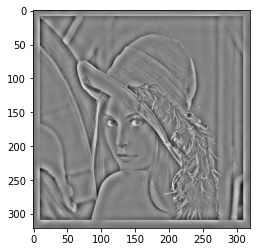

In [43]:
### ButterWorth HighPass Filter
image = cv.imread("../Image Processing GUI/grayImage.png")
image = np.array(RGB2GRAY(image))

M = len(image)
N = len(image[0])

FT_img = np.fft.fft2(image)
D0 = 15
n = 15

u = np.arange(0, M)
idx = np.argwhere(u>M/2)
u[idx] = u[idx]-M

v = np.arange(0, N)
idy = np.argwhere(v>N/2)
v[idy] = v[idy]-N

V, U = np.meshgrid(v, u)

D = np.sqrt(U**2 + V**2)

H = 1/(1+(D0/D)**n)

outputImage = np.fft.ifft2(FT_img * H)
plt.imshow(outputImage.real, cmap='gray')

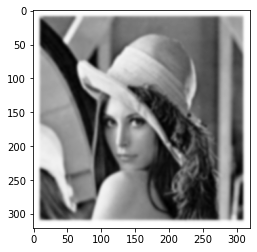

In [44]:
### Gaussian LowPass Filter
image = cv.imread("../Image Processing GUI/grayImage.png")
image = np.array(RGB2GRAY(image))

M = len(image)
N = len(image[0])

FT_img = np.fft.fft2(image)
D0 = 30
D0 = (D0**2)*2
u = np.arange(0, M)
idx = np.argwhere(u>M/2)
u[idx] = u[idx]-M

v = np.arange(0, N)
idy = np.argwhere(v>N/2)
v[idy] = v[idy]-N

V, U = np.meshgrid(v, u)

D = np.sqrt(U**2 + V**2)
D = -D**2

H = np.exp(D/D0)

outputImage = np.fft.ifft2(FT_img * H)
plt.imshow(outputImage.real, cmap='gray')

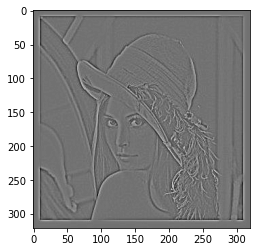

In [45]:
### Gaussian HighPass Filter
image = cv.imread("../Image Processing GUI/grayImage.png")
image = np.array(RGB2GRAY(image))

M = len(image)
N = len(image[0])

FT_img = np.fft.fft2(image)
D0 = 30
D0 = (D0**2)*2
u = np.arange(0, M)
idx = np.argwhere(u>M/2)
u[idx] = u[idx]-M

v = np.arange(0, N)
idy = np.argwhere(v>N/2)
v[idy] = v[idy]-N

V, U = np.meshgrid(v, u)

D = np.sqrt(U**2 + V**2)
D = -D**2

H = 1-np.exp(D/D0)

outputImage = np.fft.ifft2(FT_img * H)
plt.imshow(outputImage.real, cmap='gray')

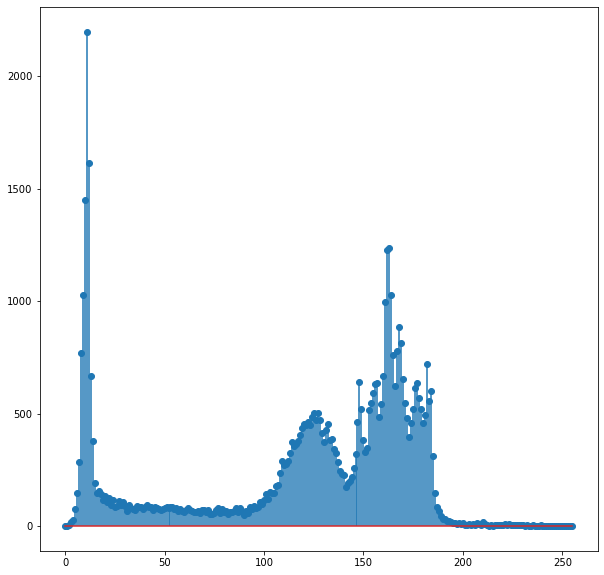

In [9]:
plotImage(image)

In [4]:
image = [
    [11,12,13,14,15],
    [16,17,18,19,20],
    [21,22,23,24,25],
    [26,27,28,29,30],
    [31,32,33,34,35],
]
getMasks(image, 2)

[array([[11, 12],
        [16, 17]]),
 array([[12, 13],
        [17, 18]]),
 array([[13, 14],
        [18, 19]]),
 array([[14, 15],
        [19, 20]]),
 array([[15,  0],
        [20,  0]]),
 array([[16, 17],
        [21, 22]]),
 array([[17, 18],
        [22, 23]]),
 array([[18, 19],
        [23, 24]]),
 array([[19, 20],
        [24, 25]]),
 array([[20,  0],
        [25,  0]]),
 array([[21, 22],
        [26, 27]]),
 array([[22, 23],
        [27, 28]]),
 array([[23, 24],
        [28, 29]]),
 array([[24, 25],
        [29, 30]]),
 array([[25,  0],
        [30,  0]]),
 array([[26, 27],
        [31, 32]]),
 array([[27, 28],
        [32, 33]]),
 array([[28, 29],
        [33, 34]]),
 array([[29, 30],
        [34, 35]]),
 array([[30,  0],
        [35,  0]]),
 array([[31, 32],
        [ 0,  0]]),
 array([[32, 33],
        [ 0,  0]]),
 array([[33, 34],
        [ 0,  0]]),
 array([[34, 35],
        [ 0,  0]]),
 array([[35,  0],
        [ 0,  0]])]

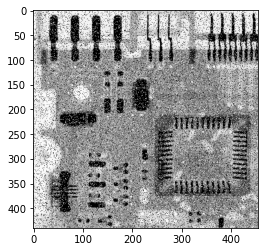

In [64]:
image = cv.imread("board.png")
image = RGB2GRAY(image)
plt.imshow(image, cmap = "gray")

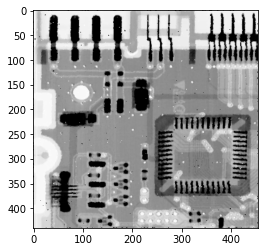

In [65]:
image = applyFilter(image, filterSize = 3, filterType = "median")
plt.imshow(image, cmap = "gray")

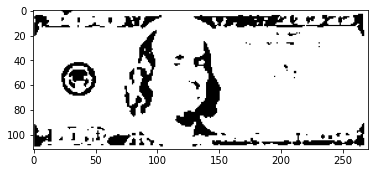

In [105]:
image2 = bitPlaneSlice(image, n_slices = 1)
plt.imshow(image2,cmap='gray')

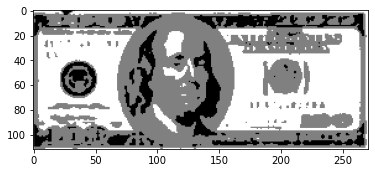

In [106]:
image2 = bitPlaneSlice(image, n_slices = 2)
plt.imshow(image2,cmap='gray')

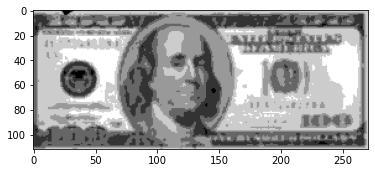

In [107]:
image2 = bitPlaneSlice(image, n_slices = 3)
plt.imshow(image2,cmap='gray')

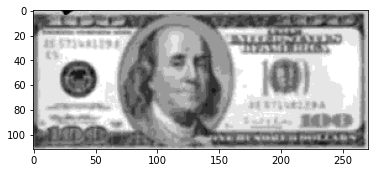

In [108]:
image2 = bitPlaneSlice(image, n_slices = 4)
plt.imshow(image2,cmap='gray')

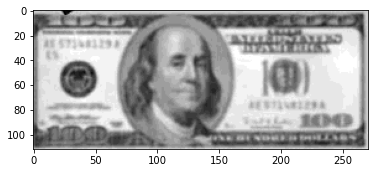

In [109]:
image2 = bitPlaneSlice(image, n_slices = 5)
plt.imshow(image2,cmap='gray')